# Laboratorio 3
## Data Science
Javier Ovalle 22103

José Ángel Morales 22689

Ricardo Morales 22289

Link del repositorio: https://github.com/Saiyan-Javi/Laboratorio-3

In [8]:
#pip install kagglehub

In [15]:
import kagglehub

#Download latest version
path = kagglehub.dataset_download("agungpambudi/mnist-multiple-dataset-comprehensive-analysis")

print("Path to dataset files:", path)

c:\Users\Javier Chiquin\AppData\Local\Programs\Python\Python312\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


100%|██████████| 874M/874M [01:15<00:00, 12.2MB/s] 

Extracting files...


Path to dataset files: C:\Users\Javier Chiquin\.cache\kagglehub\datasets\agungpambudi\mnist-multiple-dataset-comprehensive-analysis\versions\3


Como los archivos descargados vienen ya separados, se debén unificar, por lo que el siguinete código realiza esa tarea y los deja en 

In [16]:
import os
import shutil

original_train =  "C:\\Users\\Javier Chiquin\\.cache\\kagglehub\\datasets\\agungpambudi\\mnist-multiple-dataset-comprehensive-analysis\\versions\\3\\PolyMNIST\\MMNIST\\train"
original_test =  "C:\\Users\\Javier Chiquin\\.cache\\kagglehub\\datasets\\agungpambudi\\mnist-multiple-dataset-comprehensive-analysis\\versions\\3\\PolyMNIST\\MMNIST\\test"
destino_unido =  "C:\\Users\\Javier Chiquin\\.cache\\kagglehub\\datasets\\agungpambudi\\mnist-multiple-dataset-comprehensive-analysis\\versions\\3\\PolyMNIST\\MMNIST\\all_data"

modalidades = ['m0', 'm1', 'm2', 'm3', 'm4']

for mod in modalidades:
    # Crear carpeta destino si no existe
    dest_mod_path = os.path.join(destino_unido, mod)
    os.makedirs(dest_mod_path, exist_ok=True)

    # Copiar imágenes de train
    src_train = os.path.join(original_train, mod)
    for archivo in os.listdir(src_train):
        shutil.copy2(os.path.join(src_train, archivo), dest_mod_path)

    # Copiar imágenes de test
    src_test = os.path.join(original_test, mod)
    for archivo in os.listdir(src_test):
        shutil.copy2(os.path.join(src_test, archivo), dest_mod_path)

print("¡Unificación completada!")


¡Unificación completada!


In [17]:
#import opendatasets as od # no para python 3.13
import pandas as pd
import os
import zipfile
import matplotlib.pyplot as plt
from matplotlib.image import imread
import random

from os import listdir
import shutil
import numpy as np
import keras.preprocessing.image as kerasImg
import keras.layers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras import ops

Modalidad m0:
  Total de imágenes: 60000
  Tamaño de ejemplo: (28, 28)

Modalidad m1:
  Total de imágenes: 60000
  Tamaño de ejemplo: (28, 28)

Modalidad m2:
  Total de imágenes: 60000
  Tamaño de ejemplo: (28, 28)

Modalidad m3:
  Total de imágenes: 60000
  Tamaño de ejemplo: (28, 28)

Modalidad m4:
  Total de imágenes: 60000
  Tamaño de ejemplo: (28, 28)



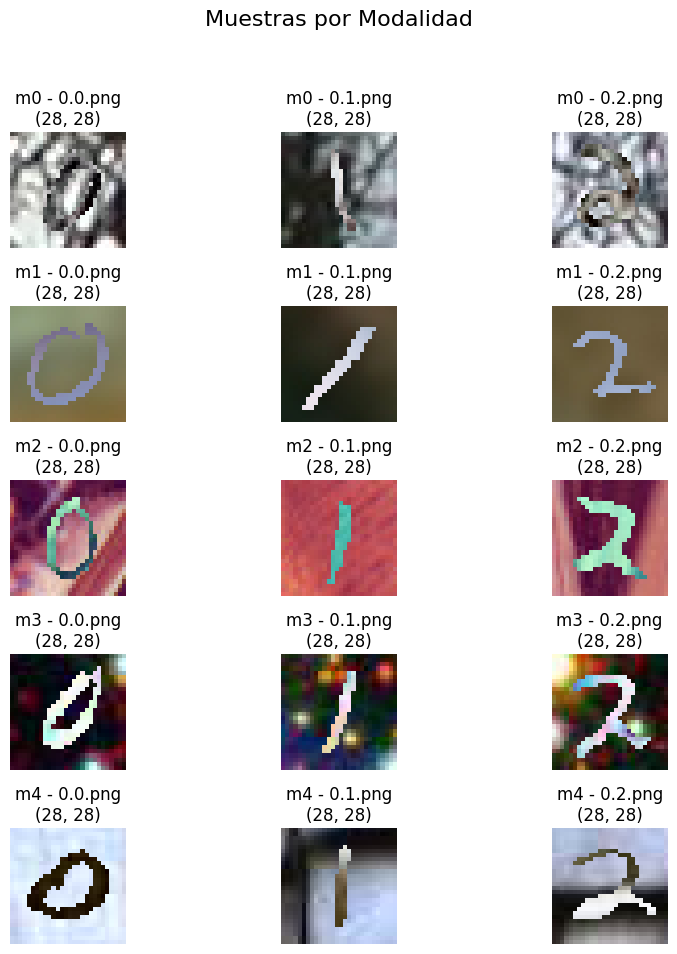

Distribución del dataset:
m0: 60000 imágenes
m1: 60000 imágenes
m2: 60000 imágenes
m3: 60000 imágenes
m4: 60000 imágenes

El dataset está balanceado (diferencia menor al 5%)


In [18]:
import os
from PIL import Image
import matplotlib.pyplot as plt

# Ruta base donde están las carpetas m0, m1, ..., m4
base_dir = "C:\\Users\\Javier Chiquin\\.cache\\kagglehub\\datasets\\agungpambudi\\mnist-multiple-dataset-comprehensive-analysis\\versions\\3\\PolyMNIST\\MMNIST\\all_data"
modalidades = ['m0', 'm1', 'm2', 'm3', 'm4']

resumen = {}

# Conteo y resolución
for mod in modalidades:
    mod_path = os.path.join(base_dir, mod)
    images = sorted([f for f in os.listdir(mod_path) if f.endswith(".png")])
    resumen[mod] = len(images)
    
    # Mostrar resolución de una imagen de ejemplo
    img_path = os.path.join(mod_path, images[0])
    img = Image.open(img_path)
    print(f"Modalidad {mod}:")
    print(f"  Total de imágenes: {len(images)}")
    print(f"  Tamaño de ejemplo: {img.size}")
    print("")

# Visualización de 3 imágenes por modalidad
fig, axes = plt.subplots(len(modalidades), 3, figsize=(9, 10))
fig.suptitle('Muestras por Modalidad', fontsize=16)

for i, mod in enumerate(modalidades):
    mod_path = os.path.join(base_dir, mod)
    images = sorted([f for f in os.listdir(mod_path) if f.endswith(".png")])
    
    for j in range(3):
        img = Image.open(os.path.join(mod_path, images[j]))
        axes[i, j].imshow(img, cmap='gray')
        axes[i, j].set_title(f"{mod} - {images[j]}\n{img.size}")
        axes[i, j].axis('off')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

# Verificar balanceo
print("Distribución del dataset:")
for mod in modalidades:
    print(f"{mod}: {resumen[mod]} imágenes")

min_val = min(resumen.values())
max_val = max(resumen.values())
if max_val - min_val <= 0.05 * max_val:
    print("\nEl dataset está balanceado (diferencia menor al 5%)")
else:
    print("\nEl dataset no está completamente balanceado")


Se puede observar que las imágenes tienen una calidad bastante mala, sin embargo tambien se encuentran imágenes decentes, además se puede notar que todas las imágenes tienen la misma dimensión 28x28.